In [25]:
import numpy as np
from qiskit import *

In [26]:
circuit = QuantumCircuit(3) 

In [27]:
circuit.h(0)

In [28]:
circuit.cx(0,1)

In [29]:
circuit.cx(0,2)

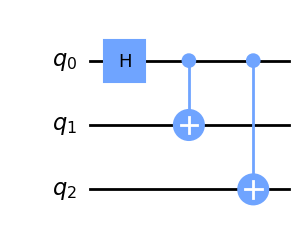

In [30]:
circuit.draw('mpl')

In [31]:
from qiskit import Aer

In [32]:
backend = Aer.get_backend('statevector_simulator')

In [33]:
job = backend.run(circuit)

In [34]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [35]:
result = job.result()

In [36]:
outputstate = result.get_statevector(circuit, decimals=4)
print(outputstate)

Statevector([0.7071+0.j, 0.    +0.j, 0.    +0.j, 0.    +0.j, 0.    +0.j,
             0.    +0.j, 0.    +0.j, 0.7071+0.j],
            dims=(2, 2, 2))


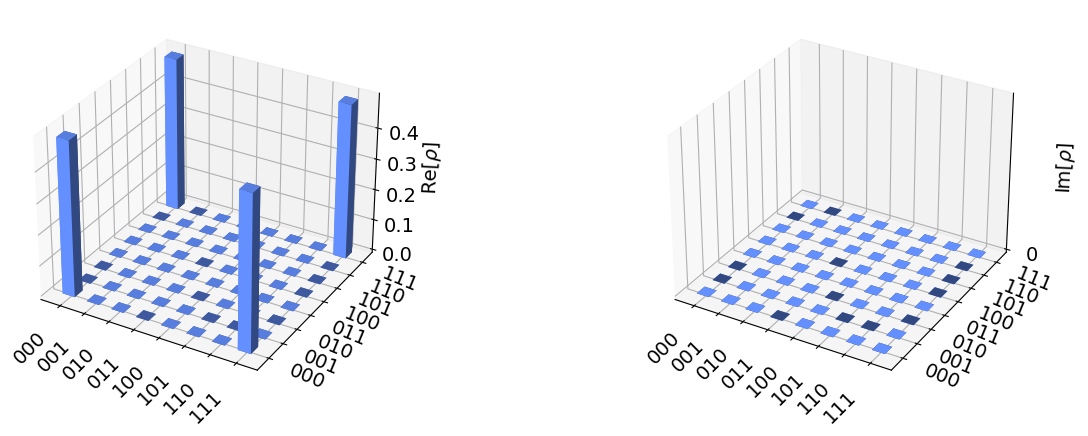

In [37]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

In [38]:
backend = Aer.get_backend('unitary_simulator')
job = backend.run(circuit)
result = job.result()
output = result.get_unitary(circuit,decimals = 3)

In [39]:
print(output)

Operator([[ 0.707+0.j,  0.707-0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
            0.   +0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
            0.   +0.j,  0.707+0.j, -0.707+0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707-0.j,  0.   +0.j,
            0.   +0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
           -0.707+0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
            0.707-0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j,  0.   +0.j,
            0.   +0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
            0.   +0.j,  0.707+0.j,  0.707-0.j],
          [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
            0.   +0.j,  0.   +0.j,  0.   +0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 

In [51]:
meas =QuantumCircuit(3,3)

In [52]:
meas.draw()

q_0: 
     
q_1: 
     
q_2: 
     
c_0: 
     
c_1: 
     
c_2:

In [53]:
meas.barrier(range(3))
meas.draw()

░ 
q_0: ─░─
      ░ 
q_1: ─░─
      ░ 
q_2: ─░─
      ░ 
c_0: ═══
        
c_1: ═══
        
c_2: ═══

In [54]:
meas.measure(range(3), range(3))
meas.draw()

░ ┌─┐      
q_0: ─░─┤M├──────
      ░ └╥┘┌─┐   
q_1: ─░──╫─┤M├───
      ░  ║ └╥┘┌─┐
q_2: ─░──╫──╫─┤M├
      ░  ║  ║ └╥┘
c_0: ════╩══╬══╬═
            ║  ║ 
c_1: ═══════╩══╬═
               ║ 
c_2: ══════════╩═

CircuitError: 'register name "c" already exists'

In [60]:
circuit.draw()

┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘
c_0: ═══════════════
                    
c_1: ═══════════════
                    
c_2: ═══════════════

In [61]:
qc = circuit.compose(meas)
circuit.draw()

┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘
c_0: ═══════════════
                    
c_1: ═══════════════
                    
c_2: ═══════════════